# **二值化与分段**

### **sklearn.preprocessing.Binarizer 根据阈值将数据二值化**

根据阈值将数据二值化（将特征值设置为0或1），用于处理连续型变量。   
大于阈值的值映射为1，而小于或等于阈值的值映射为0。默认阈值为0时，特征中所有的正值都映射到1。   
二值化是对文本计数数据的常见操作，分析人员可以决定仅考虑某种现象的存在与否。它还可以用作考虑布尔随机变量的估计器的预处理步骤（例如，使用贝叶斯设置中的伯努利分布建模）。


In [2]:
import pandas as pd
data = pd.read_csv("train.csv",index_col=0)
data = data[['Age','Sex','Embarked','Survived']]
data.reset_index(drop=True,inplace=True)
data.loc[:,"Age"] = data.loc[:,"Age"].fillna(data.loc[:,"Age"].median())
#.fillna 在DataFrame里面直接进行填补
data.dropna(axis=0,inplace=True)
data.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,0
1,38.0,female,C,1
2,26.0,female,S,1
3,35.0,female,S,1
4,35.0,male,S,0


In [4]:
#将年龄二值化
data_2 = data.copy()
from sklearn.preprocessing import Binarizer
X = data_2.iloc[:,0].values.reshape(-1,1) #类为特征专用，所以不能使用一维数组

transformer = Binarizer(threshold=30).fit_transform(X)
transformer[:5]


array([[0.],
       [1.],
       [0.],
       [1.],
       [1.]])

### **preprocessing.KBinsDiscretizer**
这是将连续型变量划分为分类变量的类，能够将连续型变量排序后按顺序分箱后编码。

总共包含三个重要参数：  
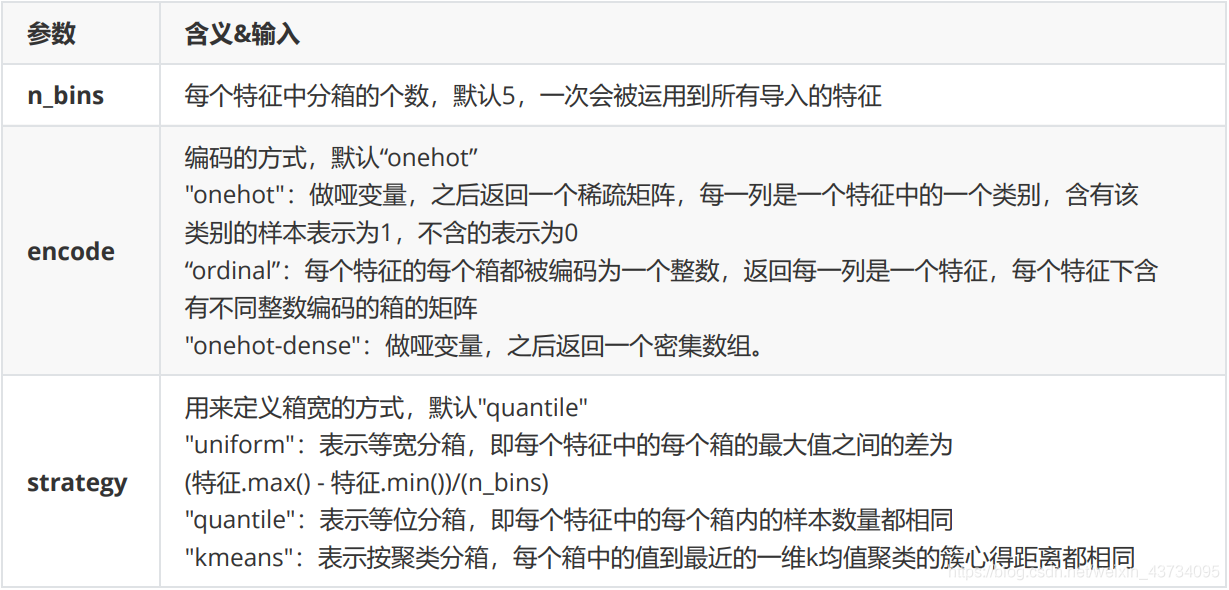

In [5]:
import pandas as pd
data = pd.read_csv("train.csv",index_col=0)
data = data[['Age','Sex','Embarked','Survived']]
data.reset_index(drop=True,inplace=True)
data.loc[:,"Age"] = data.loc[:,"Age"].fillna(data.loc[:,"Age"].median())
#.fillna 在DataFrame里面直接进行填补
data.dropna(axis=0,inplace=True)
data.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,0
1,38.0,female,C,1
2,26.0,female,S,1
3,35.0,female,S,1
4,35.0,male,S,0


In [6]:
from sklearn.preprocessing import KBinsDiscretizer
X = data.iloc[:,0].values.reshape(-1,1)

In [7]:
est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
est.fit_transform(X)

array([[0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [2.],
       [0.],
       [1.],
       [0.],
       [0.],
       [2.],
       [0.],
       [1.],
       [0.],
       [2.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [2.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],

In [8]:
#查看转换后分的箱：变成了一列中的三箱
set(est.fit_transform(X).ravel())

{0.0, 1.0, 2.0}

In [9]:
est = KBinsDiscretizer(n_bins=3, encode='onehot', strategy='uniform')
#查看转换后分的箱：变成了哑变量
est.fit_transform(X).toarray()

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])